
# ACF AND PACF

##### Find the ACF and PACF for MA(1), MA(2), AR(1) and AR(2) for the given data set regarding the number of applications submitted at the revenue office per week.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab7\\loan_data.csv",header=0,index_col=0)
df

,Applications
Week,
1,71
2,57
3,62
4,64
5,65
...,...
100,65
101,55
102,61


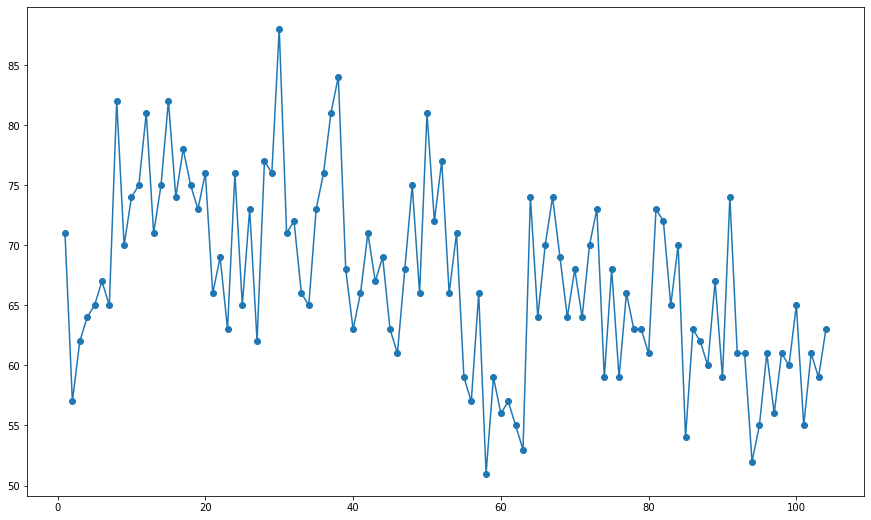

In [14]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(df.index, df['Applications'], 'o-')


In [4]:
#  The shift of pandas can be used for lag
data1 = df.copy()
# data1['value_lag1'] = data1['value'].shift(1)
# data1['value_lag2'] =  data1['value'].shift(2)
for i in [1, 2, 3, 4, 5]:
    data1[f"value_lag{i}"] = data1['Applications'].shift(i)
data1.head(10)

,Applications,value_lag1,value_lag2,value_lag3,value_lag4,value_lag5
Week,,,,,,
1,71,NaN,NaN,NaN,NaN,NaN
2,57,71.0,NaN,NaN,NaN,NaN
3,62,57.0,71.0,NaN,NaN,NaN
4,64,62.0,57.0,71.0,NaN,NaN
5,65,64.0,62.0,57.0,71.0,NaN
6,67,65.0,64.0,62.0,57.0,71.0
7,65,67.0,65.0,64.0,62.0,57.0
8,82,65.0,67.0,65.0,64.0,62.0
9,70,82.0,65.0,67.0,65.0,64.0


In [5]:
#  acf function using statsmodels package
from statsmodels.tsa.stattools import acf

In [6]:
def cal_acf(x, nlags):
    x = np.array(x)
    mean_x = np.mean(x)
    length_x = x.shape[0]
    c_0 = np.mean((x-mean_x) **2)
    c_k = np.sum((x[:(length_x-nlags)] - mean_x) * (x[nlags:] - mean_x)) / length_x
    r_k = c_k / c_0
    return r_k

In [7]:
#  Results summary 
pd.DataFrame({'index':np.arange(11),
             'value_by_myself':[cal_acf(x=df['Applications'], nlags=i) for i in range(11)],
             'value_by_statsmodels':acf(df.Applications,nlags=10)}) 

,index,value_by_myself,value_by_statsmodels
0,0,1.000000,1.000000
1,1,0.461735,0.461735
2,2,0.531439,0.531439
3,3,0.291488,0.291488
4,4,0.268240,0.268240
5,5,0.229724,0.229724
6,6,0.191830,0.191830
7,7,0.248383,0.248383
8,8,0.116153,0.116153
9,9,0.170142,0.170142


(-1.0, 15.5)

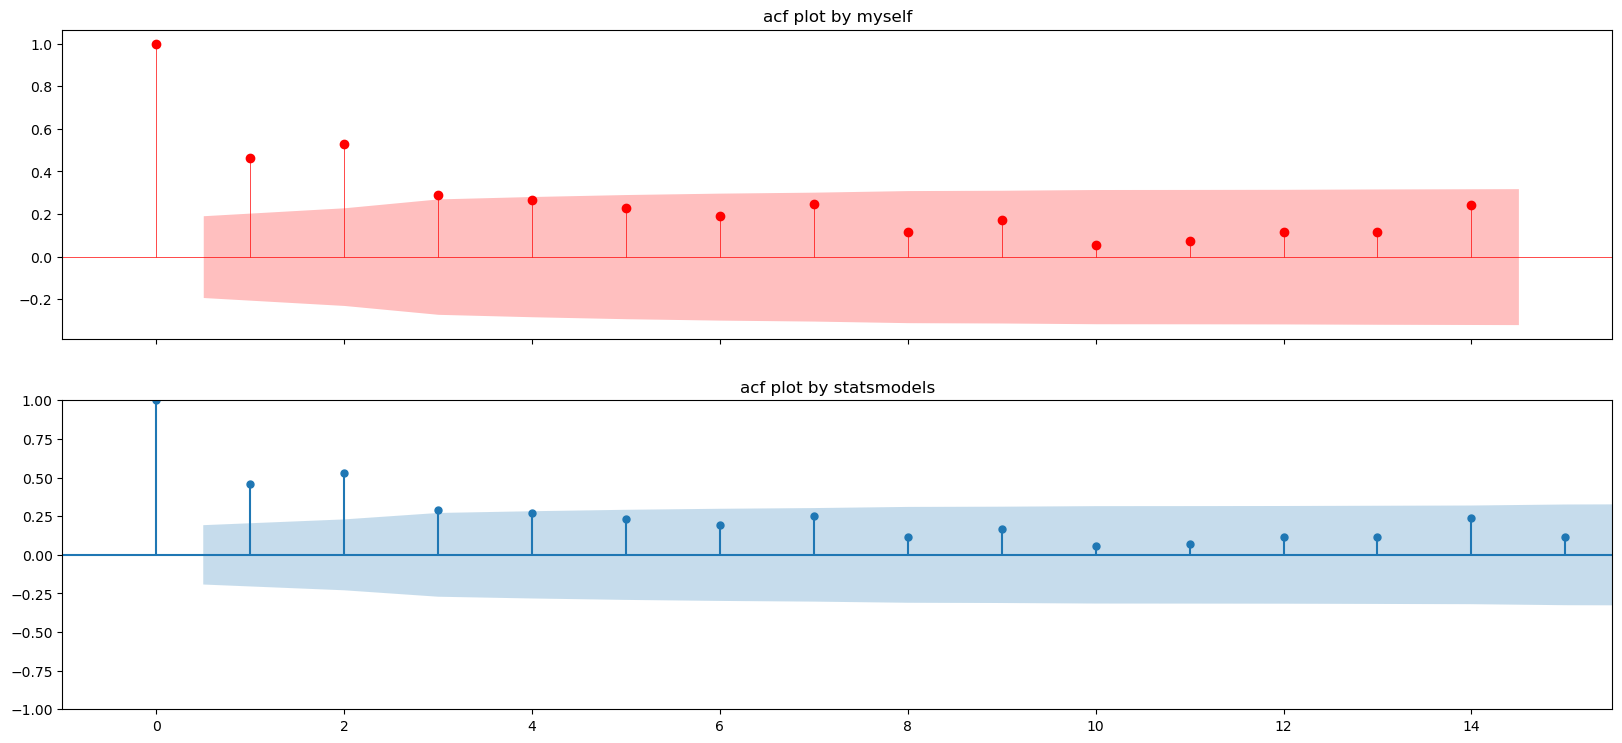

In [8]:
#  Draw one yourself
#  Calculate yourself
acf_value, acf_interval, _, _ = acf(df.Applications,nlags=14,qstat=True,alpha=0.05, fft=False)

xlabel = np.arange(start=0, stop=acf_value.shape[0], dtype='float')

fig, ax = plt.subplots(nrows=2, figsize=(20,9), sharex=True, dpi=100)
ax[0].hlines(y=0, xmin=np.min(xlabel)-2, xmax=np.max(xlabel)+2, colors='red', linewidth=0.5)
ax[0].scatter(x=xlabel, y=acf_value, c='red')
ax[0].vlines(x = xlabel, ymin=0, ymax=acf_value, colors='red', linewidth=0.5)
xlabel[1] -= 0.5
xlabel[-1] += 0.5
ax[0].fill_between(x=xlabel[1:], y1=acf_interval[1:,0] - acf_value[1:], y2=acf_interval[1:, 1]-acf_value[1:], alpha=0.25, linewidth=0, color='red')
ax[0].set_title("acf plot by myself")


#  Use functions written by others

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Applications'], ax=ax[1])
ax[1].set_title("acf plot by statsmodels")
ax[1].set_xlim(-1, np.max(xlabel)+1)

In [9]:
#  Use the pacf function of the statsmodels package
from statsmodels.tsa.stattools import pacf

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-1.0, 16.5)

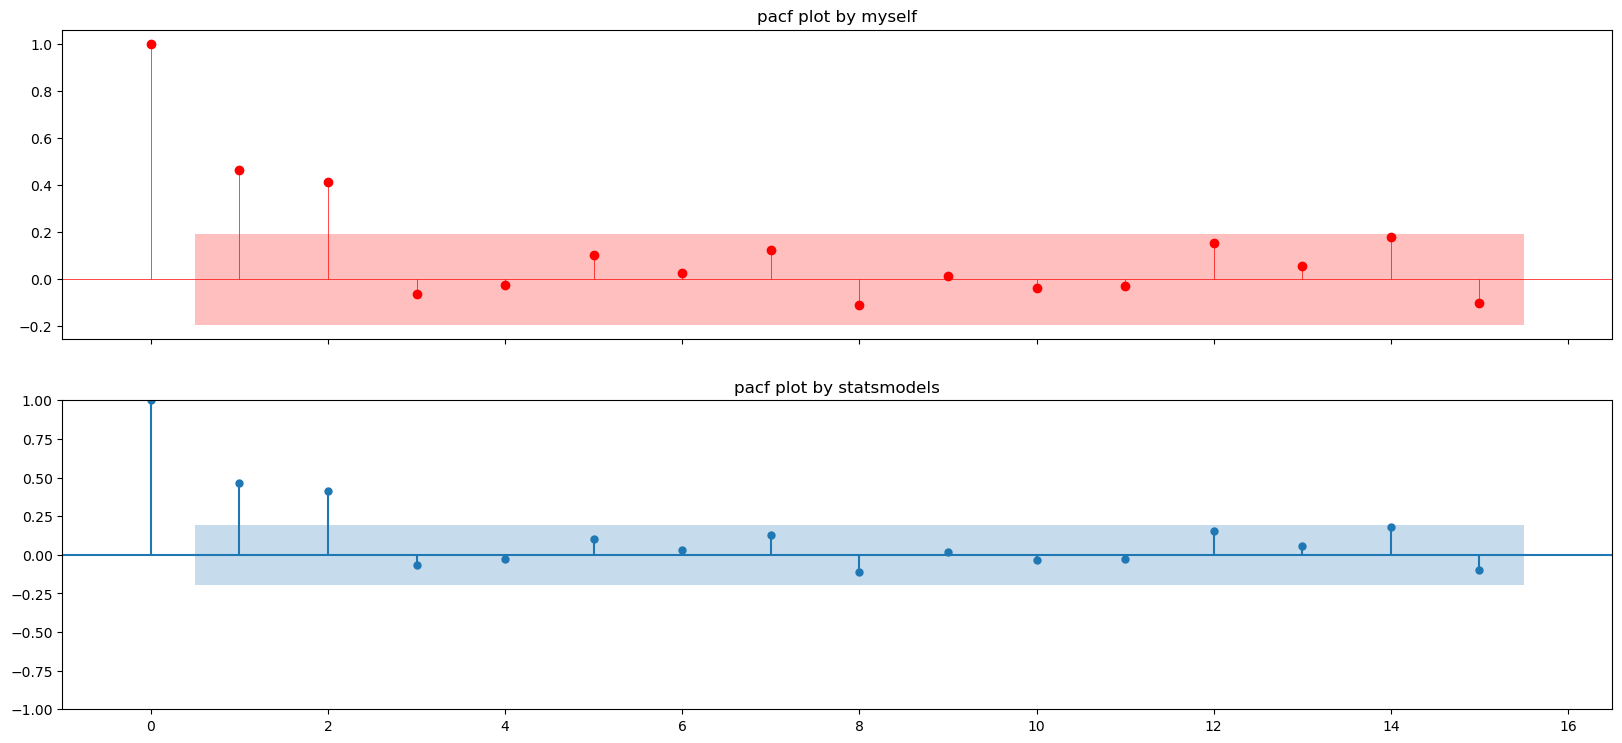

In [10]:
#  Draw one yourself
#  Calculate yourself
pacf_value, pacf_interval = pacf(df.Applications,nlags=15,alpha=0.05)

xlabel = np.arange(start=0, stop=pacf_value.shape[0], dtype='float')

fig, ax = plt.subplots(nrows=2, figsize=(20,9), sharex=True, dpi=100)
ax[0].hlines(y=0, xmin=np.min(xlabel)-2, xmax=np.max(xlabel)+2, colors='red', linewidth=0.5)
ax[0].scatter(x=xlabel, y=pacf_value, c='red')
ax[0].vlines(x = xlabel, ymin=0, ymax=pacf_value, colors='red', linewidth=0.5)
xlabel[1] -= 0.5
xlabel[-1] += 0.5
ax[0].fill_between(x=xlabel[1:], y1=pacf_interval[1:,0] - pacf_value[1:], y2=pacf_interval[1:, 1]-pacf_value[1:], alpha=0.25, linewidth=0, color='red')
ax[0].set_title("pacf plot by myself")


#  Use functions written by others


from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Applications, ax=ax[1], lags=15)
ax[1].set_title("pacf plot by statsmodels")
ax[1].set_xlim(-1, np.max(xlabel)+1)